# Graph the losses

In [1]:
NOTEBOOK_PATH = "C:/Users/Xetrov/Desktop/SciFair20/Code/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

In [3]:
def most_recent_file(pattern):
    return max(glob.iglob(pattern, recursive=True), key=os.path.getctime)

In [4]:
# Read multiple log files
log_files = glob.glob(NOTEBOOK_PATH + "Loss Logs/dnn6-binary **")
print(log_files)
log_df = pd.concat((pd.read_csv(x) for x in log_files))
log_df.reset_index(drop=True)
log_df['epoch'] += 1

['C:/Users/Xetrov/Desktop/SciFair20/Code/Loss Logs\\dnn6-binary (10-27-2019, 1005PM)']


In [10]:
# Read the most recent log file
logpath = most_recent_file(NOTEBOOK_PATH + "Loss Logs/**")
# logpath = most_recent_file()
log_df = pd.read_csv(logpath)
log_df['epoch'] += 1

print(logpath)

C:/Users/Xetrov/Desktop/SciFair20/Code/Loss Logs\cnn8-10deep (11-10-2019, 1100PM)


epoch       84.000000
acc          0.998808
loss         0.006039
val_acc      0.998303
val_loss     0.008070
Name: 84, dtype: float64


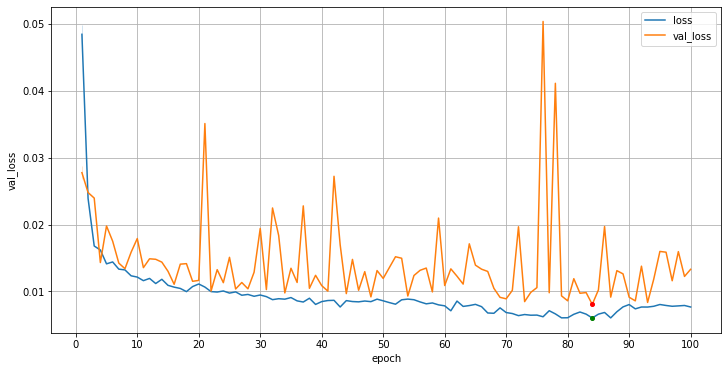

In [11]:
plot_df = log_df[:]

metric = 'loss'

plt.figure(figsize=(12,6))
sns.lineplot(x='epoch', y=metric, data=plot_df, label=metric)
sns.lineplot(x='epoch', y='val_'+metric, data=plot_df, label='val_'+metric)
plt.legend()

minEpoch = plot_df.loc[plot_df.idxmin()[metric]]
plt.plot((minEpoch['epoch']), (minEpoch[metric]), 'go', markersize=4)

minEpoch = plot_df.loc[plot_df.idxmin()['val_'+metric]]
plt.plot((minEpoch['epoch']), (minEpoch['val_'+metric]), 'ro', markersize=4)
print(minEpoch)

plt.xticks(list(range(0, plot_df['epoch'].max()+1, 10)))
# plt.yticks(list(np.arange(0.0,0.4,0.05)))

plt.grid(True)